In [51]:

import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import sklearn.cluster as cluster

In [52]:
df = pd.read_csv('google_drive_nanreplaced.csv')

In [53]:
df.head()

,time,1day_active_users,1day_google_documents_active_users,1day_google_drawings_active_users,1day_google_forms_active_users,1day_google_presentations_active_users,1day_google_sites_active_users,1day_google_spreadsheets_active_users,1day_other_types_active_users,30day_active_users,...,owned_items_with_visibility_unknown_delta,owned_items_with_visibility_unknown_removed,owned_other_types_added,owned_other_types_created,owned_other_types_delta,owned_other_types_edited,owned_other_types_removed,owned_other_types_trashed,owned_other_types_viewed,sharers
0,2017-03-12 05:00:00,1543.0,2499.954068,7.240157,54.104987,474.077428,25.604369,1107.56168,1314.187664,15955.695538,...,0.0,0.0,0.0,3509.0,0.0,193.0,0.0,173.0,1173.0,0.0
1,2017-03-14 04:00:00,2495.0,2499.954068,7.240157,54.104987,474.077428,25.604369,1107.56168,1314.187664,15955.695538,...,0.0,0.0,0.0,6275.0,0.0,837.0,0.0,1018.0,1759.0,0.0
2,2017-03-16 04:00:00,2403.0,2499.954068,7.240157,54.104987,474.077428,25.604369,1107.56168,1314.187664,15955.695538,...,0.0,0.0,0.0,22084.0,0.0,820.0,0.0,805.0,1451.0,0.0
3,2017-03-19 04:00:00,2848.0,2499.954068,7.240157,54.104987,474.077428,25.604369,1107.56168,1314.187664,15955.695538,...,0.0,0.0,0.0,51355.0,0.0,725.0,0.0,737.0,1247.0,0.0
4,2017-03-20 04:00:00,5302.0,2499.954068,7.240157,54.104987,474.077428,25.604369,1107.56168,1314.187664,15955.695538,...,0.0,0.0,0.0,9979.0,0.0,1330.0,0.0,924.0,2339.0,0.0


In [54]:
df1= df[['time','google_forms_created','google_forms_edited']]

In [55]:
df1.head()

,time,google_forms_created,google_forms_edited
0,2017-03-12 05:00:00,0.0,0.0
1,2017-03-14 04:00:00,0.0,0.0
2,2017-03-16 04:00:00,0.0,0.0
3,2017-03-19 04:00:00,0.0,0.0
4,2017-03-20 04:00:00,0.0,0.0


In [56]:
df1.time.dtype

dtype('O')

In [57]:
df1.time.loc[0]

'2017-03-12 05:00:00'

In [58]:

from datetime import datetime
datetime.strptime("2017-03-12:05:00:00", "%Y-%m-%d:%H:%M:%S")

datetime.datetime(2017, 3, 12, 5, 0)

In [59]:

df1.time = df1.time.apply(lambda d: datetime.strptime(d, "%Y-%m-%d %H:%M:%S"))

In [60]:
df1['Month'] = df1['time'].dt.month
df1['day'] = df1['time'].dt.day
df1['week']=df1['time'].dt.week

In [61]:
df1.head()

,time,google_forms_created,google_forms_edited,Month,day,week
0,2017-03-12 05:00:00,0.0,0.0,3,12,10
1,2017-03-14 04:00:00,0.0,0.0,3,14,11
2,2017-03-16 04:00:00,0.0,0.0,3,16,11
3,2017-03-19 04:00:00,0.0,0.0,3,19,11
4,2017-03-20 04:00:00,0.0,0.0,3,20,12


True


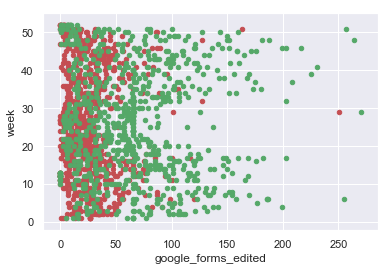

In [62]:
ax1 = df1.plot(kind='scatter', x='google_forms_created', y='week', color='r')    
ax2 = df1.plot(kind='scatter', x='google_forms_edited', y='week', color='g', ax=ax1)    
print(ax1==ax2)

In [65]:
def plot_clusters(data, algorithm, args, kwds):
    labels = algorithm(*args, **kwds).fit_predict(data)
    palette = sns.color_palette('deep', np.unique(labels).max() + 1)
    colors = [palette[x] if x >= 0 else (0.0, 0.0, 0.0) for x in labels]
    plt.scatter(data.T[0], data.T[1], c=colors, **plot_kwds)
    frame = plt.gca()
    frame.axes.get_xaxis().set_visible(False)
    frame.axes.get_yaxis().set_visible(False)
    plt.title('Clusters found by {}'.format(str(algorithm.__name__)), fontsize=24)
    plt.text(-0.5, 0.7, 'Clustering took {:.2f} s'.format(end_time - start_time), fontsize=14)

In [98]:
# Using scikit-learn to perform K-Means clustering
from sklearn.cluster import KMeans
df2=df1[['google_forms_created','google_forms_edited','Month','day','week']]
X=df2
# Specify the number of clusters (3) and fit the data X
kmeans = KMeans(n_clusters=20, random_state=0).fit(X)

In [99]:
# Get the cluster centroids
print(kmeans.cluster_centers_)
    
# Get the cluster labels
print(kmeans.labels_)

[[ 40.39622642  99.98113208   2.86792453  14.83018868  10.79245283]
 [ 14.80434783  38.2173913   10.06521739  15.2826087   41.67391304]
 [ 69.77777778 222.66666667   8.66666667  16.44444444  36.22222222]
 [ 13.17460317  29.14285714   3.50793651  19.65079365  13.74603175]
 [ 29.04105559  71.84816018   5.10169492  24.05084746  20.74576271]
 [ 33.25        90.71666667   9.58333333  16.66666667  40.11666667]
 [ 41.4        161.36         8.68        17.84        36.44      ]
 [  4.68518519  12.46296296   4.62962963   7.33333333  16.75925926]
 [  7.05263158  17.60526316   9.5          9.60526316  38.26315789]
 [ 24.13113743  64.78799655   8.36904762  10.4047619   33.85714286]
 [ 21.13043478  53.43478261   5.91304348  23.47826087  24.97826087]
 [ 49.11111111 115.58333333   9.66666667  14.11111111  40.16666667]
 [  3.22641509   6.73584906   4.71698113  23.47169811  19.47169811]
 [207.         263.5          9.5         18.5         40.        ]
 [107.16666667 178.58333333   4.58333333  19.583

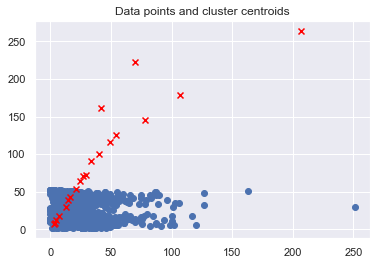

In [100]:
 
# Plotting the cluster centers and the data points on a 2D plane
plt.scatter(X.iloc[:,0], X.iloc[:,-1])
    
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c='red', marker='x')
    
plt.title('Data points and cluster centroids')
plt.show()

In [82]:
# Calculate silhouette_score
from sklearn.metrics import silhouette_score

print(silhouette_score(X, kmeans.labels_))

0.42483927404481425
